In [89]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob
 
import twitter_credentials

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [90]:
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth


In [91]:
# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)

In [92]:
# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

In [93]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.full_text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df


In [94]:
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_retweets(self):
        tweets = []
        for tweet in Cursor(self.twitter_client.retweets, id=self.twitter_user).items():
            tweets.append(tweet)
        return tweets

    def get_friend_list(self,num_tweets=900):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_tweets):
            friend_list.append(friend)
        return friend_list
    
    def get_follower_list(self,num_tweets=900):
        follower_list = []
        for follower in Cursor(self.twitter_client.followers, id=self.twitter_user).items(num_tweets):
            follower_list.append(follower)
        return follower_list
    
    def get_follower_ids(self,num_tweets=900):
        follower_ids = []
        for follower in Cursor(self.twitter_client.followers_ids, id=self.twitter_user).items(num_tweets):
            follower_ids.append(follower)
        return follower_ids
    
    def get_friend_ids(self,num_tweets=900):
        friend_ids = []
        for friend in Cursor(self.twitter_client.friends_ids, id=self.twitter_user).items(num_tweets):
            friend_ids.append(friend)
        return friend_ids
    
    def search_tweets(self,query,num_tweets=900):
        tweets=[]
        for tweet in Cursor(self.twitter_client.search, q=query).items(num_tweets):
            tweets.append(tweet)
        return tweets
        

    def get_home_timeline_tweets(self, num_tweets=900):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
    
    def get_user_timeline_tweets(self, num_tweets=900):
        user_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user,tweet_mode="extended").items(num_tweets):
            user_timeline_tweets.append(tweet)
        return user_timeline_tweets
    
    def get_no_of_friends(self, num_tweets=900):
        c = Cursor(self.twitter_client.friends, id=self.twitter_user)
        count = 0
        for friends in c.items():
            count += 1
        return count
    
        
    


In [95]:
user_id='@pycon'
twitter_client = TwitterClient(user_id)
tweet_analyzer = TweetAnalyzer()

api = twitter_client.get_twitter_client_api()

friends=twitter_client.get_no_of_friends()
print(friends)


6


In [96]:
follower_ids=twitter_client.get_follower_ids()
print(twitter_client.get_follower_ids())
friend_ids=twitter_client.get_friend_ids()
print(twitter_client.get_friend_ids())

[1137258091706290176, 1277619711468023808, 1404932460375203840, 215950652, 1210882901316755456, 976718440147931137, 751830059711918080, 1396286551689023490, 869430588, 144498030, 275426406, 1396063821060481027, 347690389, 1358283395235651589, 1108755849978224641, 1403159502724100096, 4448231843, 1411378478201573379, 1315096822470316035, 1333079610238533632, 1409996724714852359, 1411129812668850181, 1347701197352939521, 2573082584, 1401863456, 1178677587603648512, 1193169173209341952, 1411396233072152578, 1409884555587244041, 1606059955, 838055468811620352, 2881966013, 1254510499120640000, 1071779661640802304, 1411088809140363264, 306909052, 66361418, 1120046081675542528, 1405399578245955588, 14076948, 1286376865511481345, 1409709959504334848, 22076767, 883625223773274113, 1298210161119637505, 3043923487, 1410266084259868684, 1117951382, 1410411467216613382, 1323847836878864384, 1203580638, 1298577394056474625, 1409076550675357699, 915052036042891264, 1267875255571406855, 287953380, 140

[63873759, 863550314, 948661949629456384, 15174809, 14336304, 15804774]


In [97]:
#FF Ratio(25% of twit)
friend_count=len(friend_ids)
follower_count=len(follower_ids)
ff_ratio=follower_count/friend_count
ff_ratio

150.0

In [98]:
ff_score=0
if ff_ratio>1:
    ff_score=10
elif ff_score==0:
    ff_score=0
else:
    ff_score=5;

In [99]:
ff_score=ff_score*(25/10)

In [100]:
#Relevance score is listed ratio

In [101]:
#listed ratio-no of followers they follow back
listed=list(set(follower_ids) & set(friend_ids)) #intersection of the two lists
listed
listed_count=len(listed)
follower_count=len(follower_ids)
listed_ratio=listed_count/follower_count
listed_ratio

0.0

In [102]:
listed_score=0
if listed_ratio>0.5:
    listed_score=10
else:
    listed_score=0

In [103]:
relevance_score=listed_score*(25/10)

In [104]:
#usage score

In [105]:
#tweet frequency
utt=twitter_client.get_user_timeline_tweets()
date_time=[]
for i in utt:
    date_time.append(i.created_at)

In [106]:
from datetime import timedelta

sumdeltas = timedelta(seconds=0)
i = 1
while i < len(date_time):
    sumdeltas += date_time[i-1] - date_time[i]
    i = i + 1

avg_delta = sumdeltas / (len(date_time) - 1)
avg_delta

datetime.timedelta(days=1, seconds=2611, microseconds=807564)

In [107]:
tweet_frequency_score=0
if avg_delta.days<7:
    tweet_frequency_score=10
elif avg_delta.days>30:
    tweet_frequency_score=0
else:
    tweet_frequency_score=5

In [108]:
#media (amount of status posted)
media =len(utt)
media

900

In [109]:
media_score=0
if media>50:
    media_score=10
elif media<5:
    media_score=0
else:
    media_score=5

In [110]:
#twitter bio (positve factor)
user = api.get_user(user_id)

# fetching the description
description = user.description
if description=='':
    bio_factor=0
else:
    bio_factor=1


In [111]:
twitter_bio_score=0
if description:
    twitter_bio_score=10

In [112]:
#twitter profile picture (positive)
profile_pic= user.profile_image_url
if profile_pic=='http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png':
    pic_factor=0
else:
    pic_factor=1

In [113]:
profile_pic_score=0;
if pic_factor:
    profile_pic_score=10    

In [114]:
usage_score=tweet_frequency_score+media_score+profile_pic_score+twitter_bio_score*(25/40)

In [115]:
#authenticity score

In [116]:
#duration
from datetime import datetime
user_created=user.created_at
duration=datetime.now()-user_created
duration

datetime.timedelta(days=5011, seconds=50225, microseconds=806747)

In [117]:
duration_score=0
if duration.days>30:
    duration_score=10

In [118]:
#following count
friend_count

6

In [119]:
following_count_score=0
if friend_count>100:
    following_count_score=10
elif friend_count<10:
    following_count_score=0
else:
    following_count_score=5

In [120]:
authenticity_score=duration_score+following_count_score*(25/20)

In [121]:
#twit score calculation
twit_score=ff_score+relevance_score+usage_score+authenticity_score
twit_score

71.25

In [122]:
#profile score

In [123]:
df = tweet_analyzer.tweets_to_data_frame(utt)    
df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

print(df)    

                                                tweets                   id  \
0    🐍 Take a look! 🐍 \nA few highlights along with...  1403083027551506433   
1    🐍 🎙️ 💬  The conference tutorials, talks, works...  1400849442455097347   
2    #PyConUS Keynote addresses are now live on the...  1400182936721297412   
3    #PyConUS2021 is now behind us and the final ed...  1398319693920878593   
4    The final keynote from #PyConUS2021 was from t...  1397670156332044293   
..                                                 ...                  ...   
895  Since 2011, companies behind your favorite too...  1071071879887249409   
896  #StartupRow companies use Python in all sorts ...  1070422635333464064   
897  #StartupRow companies use Python to build the ...  1068248268650491904   
898  Just a few more hours to donate to the @ThePSF...  1067557939169423361   
899  Support @ThePSF by sponsoring @pycon 2019! We'...  1067448047993540608   

     len                date         source  likes 

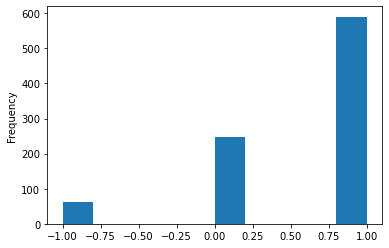

In [124]:
df.sentiment.plot(kind='hist');

In [125]:
df.sentiment.value_counts()

 1    590
 0    247
-1     63
Name: sentiment, dtype: int64

In [126]:
profile_score=len(df[df.sentiment==1])/len(df.sentiment)

In [127]:
profile_score=profile_score*100
profile_score

65.55555555555556

In [128]:
#financial score

In [129]:
query=''+user_id+' python'

In [130]:
searched_tweets=twitter_client.search_tweets(query)

In [131]:
searched_tweets

[Status(_api=<tweepy.api.API object at 0x000001F333ADE8E0>, _json={'created_at': 'Sat Jul 03 11:29:09 +0000 2021', 'id': 1411285882787844099, 'id_str': '1411285882787844099', 'text': 'RT @pennylaneai: What are quantum computers, and how can we train them in Python?\n\nCheck out this crunchy talk from PennyLane lead dev @3rd…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'pennylaneai', 'name': 'PennyLane', 'id': 1177708421166112768, 'id_str': '1177708421166112768', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1373664574810025992, 'id_str': '1373664574810025992', 'name': 'Cellysia ∞ 🏳️\u200d🌈 ∞', 'screen_name': '0lympicker'

In [132]:
len(searched_tweets)

8

In [133]:
## trying out another method to search

In [134]:
df.tweets

0      🐍 Take a look! 🐍 \nA few highlights along with...
1      🐍 🎙️ 💬  The conference tutorials, talks, works...
2      #PyConUS Keynote addresses are now live on the...
3      #PyConUS2021 is now behind us and the final ed...
4      The final keynote from #PyConUS2021 was from t...
                             ...                        
895    Since 2011, companies behind your favorite too...
896    #StartupRow companies use Python in all sorts ...
897    #StartupRow companies use Python to build the ...
898    Just a few more hours to donate to the @ThePSF...
899    Support @ThePSF by sponsoring @pycon 2019! We'...
Name: tweets, Length: 900, dtype: object

In [135]:
type(df.tweets)

pandas.core.series.Series

In [136]:
df.tweets[0].split()


['🐍',
 'Take',
 'a',
 'look!',
 '🐍',
 'A',
 'few',
 'highlights',
 'along',
 'with',
 'the',
 'conference',
 'and',
 'keynote',
 'graphics',
 'from',
 '@MindsEyeCCF',
 'are',
 'available',
 'for',
 'download',
 'on',
 'the',
 '#PyConUS',
 'website:',
 'https://t.co/nZXZrdUb8q']

In [137]:
for i in utt:
    print(len(i.full_text))

176
178
183
294
261
232
138
222
216
153
216
236
68
140
139
140
212
144
139
139
140
143
93
140
114
140
245
206
222
186
280
226
273
191
260
258
273
275
140
208
140
140
25
197
265
304
289
299
303
140
61
78
139
140
140
296
287
140
114
140
140
168
139
153
140
140
47
186
271
61
35
140
267
104
140
109
90
140
140
140
162
140
140
111
139
104
109
140
140
222
140
144
94
49
133
53
97
126
130
74
140
262
138
140
114
139
140
140
140
100
140
303
67
290
117
301
260
102
144
253
60
135
88
140
300
170
139
141
144
93
140
109
140
297
140
140
140
103
139
140
140
202
62
139
88
187
47
140
82
273
140
229
206
140
124
144
173
140
36
98
140
34
63
167
280
226
297
144
175
69
139
278
140
140
88
64
74
140
60
140
140
180
148
119
67
140
140
247
95
29
89
197
128
140
118
112
101
140
140
136
115
40
132
292
193
39
98
70
147
109
87
275
76
28
143
140
173
141
50
65
47
120
176
280
87
133
87
238
292
294
180
155
229
119
292
83
254
255
140
260
162
278
247
297
140
102
242
109
210
150
70
81
66
139
139
140
60
194
107
140
175
214
140


In [138]:
financial_hashtags=['#financialfreedom',
 '#wallstreet',
 '#investments',
 '#motivation',
 '#economy',
 '#finance',
 '#fintech',
 '#trader',
 '#lifestyle',
 '#forextrader',
 '#money',
 '#accounting',
 '#success',
 '#bhfyp',
 '#luxury',
 '#wealth',
 '#tax',
 '#cryptocurrency',
 '#stockmarket',
 '#covid',
 '#personalfinance',
 '#financialadvisor',
 '#financialplanning',
 '#investor',
 '#passiveincome',
 '#financeminister',
 '#mortgage',
 '#investing',
 '#cash',
 '#business',
 '#goals',
 '#entrepreneurship',
 '#education',
 '#india',
 '#startup',
 '#debtfree',
 '#forex',
 '#marketing',
 '#invest',
 '#accountant',
 '#insurance',
 '#banking',
 '#crypto',
 '#rich',
 '#financetips',
 '#blockchain',
 '#entrepreneur',
 '#trading',
 '#financialliteracy',
 '#businessowner',
 '#creditrepair',
 '#stocks',
 '#investment',
 '#millionaire',
 '#financial',
 '#realestate',
 '#daytrader',
 '#smallbusiness',
 '#credit',
 '#loans','#loan'
 '#bitcoin']


In [139]:
financial_words=[x[1:] for x in financial_hashtags]

In [140]:
#checking if a word from fin_hash is there in the tweet
count=0
list_of_financial_tweets=[]
for i in range(len(utt)):
    res = [ele for ele in financial_words if(ele in utt[i].full_text.lower())] 
    if(res):
        count+=1
        list_of_financial_tweets.append(utt[i])

print(count)

103


In [141]:
financial_dataframe=tweet_analyzer.tweets_to_data_frame(list_of_financial_tweets)    
financial_dataframe

,tweets,id,len,date,source,likes,retweets
0,The final keynote from #PyConUS2021 was from t...,1397670156332044293,261,2021-05-26 21:45:07,Sprout Social,74,20
1,RT @terriko: After some successful sprinting a...,1395018592341708804,140,2021-05-19 14:08:45,Twitter Web App,0,1
2,"Our Mentored Sprints coordinators, Humble Data...",1394030009984110592,222,2021-05-16 20:40:28,Twitter Web App,14,0
3,"Our Language Summit, Education and Trainers Su...",1394030008860033025,186,2021-05-16 20:40:28,Twitter Web App,15,0
4,Our Financial Aid committee ensured that the p...,1394030006574145536,226,2021-05-16 20:40:28,Twitter Web App,15,0
...,...,...,...,...,...,...,...
98,#StartupRow companies have been acquired by co...,1072159084126896128,266,2018-12-10 16:00:20,Sprout Social,5,3
99,"Since 2011, companies behind your favorite too...",1071071879887249409,284,2018-12-07 16:00:10,Sprout Social,11,3
100,#StartupRow companies use Python in all sorts ...,1070422635333464064,269,2018-12-05 21:00:18,Sprout Social,5,4
101,#StartupRow companies use Python to build the ...,1068248268650491904,263,2018-11-29 21:00:08,Sprout Social,2,2


In [142]:
train_df=pd.read_csv('million_tweets.csv')

In [143]:
train_df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [144]:
train_df.columns=['polarity','id','date_time','query','user','tweet']

In [145]:
train_df.head()

,polarity,id,date_time,query,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [146]:
train_df.polarity.value_counts()

4    800000
0    799999
Name: polarity, dtype: int64

In [147]:
train_df.polarity.replace({4:1,0:0},inplace=True)

In [148]:
train_df=train_df.sample(n=1000)

In [149]:
train_df

,polarity,id,date_time,query,user,tweet
655563,0,2240005823,Fri Jun 19 09:13:31 PDT 2009,NO_QUERY,Audnumber,"TGIF..........wait, not looking forward to dri..."
848263,1,1564779690,Mon Apr 20 04:53:54 PDT 2009,NO_QUERY,GaLiNd3z,"@VayaG my too, they were awesome )"
1423183,1,2058641650,Sat Jun 06 15:20:34 PDT 2009,NO_QUERY,sugarlace,@catjuan my house is an open house for champor...
1419369,1,2057955930,Sat Jun 06 13:59:14 PDT 2009,NO_QUERY,mccoy81603,Ppdurham i'm watching white chicks with my mom...
585895,0,2215790498,Wed Jun 17 18:36:54 PDT 2009,NO_QUERY,carl0sroman,@JenalynMichelle I miss you too niggga. you do...
...,...,...,...,...,...,...
196616,0,1970763494,Sat May 30 05:07:30 PDT 2009,NO_QUERY,teh_gurumeister,@robineccles you mistweeted here's the link a...
1201376,1,1985662270,Sun May 31 17:32:11 PDT 2009,NO_QUERY,niicolemarshall,listening to thenewno2... @dhaniharrison is ab...
176863,0,1965464799,Fri May 29 15:58:11 PDT 2009,NO_QUERY,jasminepotts,@nattymsmith they have nice cakes why can't I...
937813,1,1793309636,Thu May 14 02:11:32 PDT 2009,NO_QUERY,iandolphin24,PR @jimrhiz Here's a bit more data I'm losing...


In [150]:
train_df.to_csv("sentiment140-subset.csv",index=False)

In [151]:
train_df.polarity.value_counts()

0    533
1    467
Name: polarity, dtype: int64

In [152]:
train_df.nunique()

polarity        2
id           1000
date_time    1000
query           1
user          997
tweet         999
dtype: int64

In [153]:
train_df.drop(columns=['date_time','query','user','id'],inplace=True)

In [154]:
train_df

,polarity,tweet
655563,0,"TGIF..........wait, not looking forward to dri..."
848263,1,"@VayaG my too, they were awesome )"
1423183,1,@catjuan my house is an open house for champor...
1419369,1,Ppdurham i'm watching white chicks with my mom...
585895,0,@JenalynMichelle I miss you too niggga. you do...
...,...,...
196616,0,@robineccles you mistweeted here's the link a...
1201376,1,listening to thenewno2... @dhaniharrison is ab...
176863,0,@nattymsmith they have nice cakes why can't I...
937813,1,PR @jimrhiz Here's a bit more data I'm losing...


In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [156]:
train_df_X=train_df['tweet']
train_df_y=train_df['polarity']

In [157]:
import pandas as pd
import numpy as np
import re 
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\NDEE5U8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     D:\Users\NDEE5U8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
def preprocess_tweet_text(tweet):
    #lower case
    tweet=tweet.lower()
    #remove urls
    tweet=re.sub(r"http\S+|www\S+|https\S+","",tweet,flags=re.MULTILINE)
    #remove punctuation
    tweet=tweet.translate(str.maketrans("","",string.punctuation))
    #remove user @ and # from hashtags
    tweet=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet)
    #remove stopwords
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[word for word in tweet_tokens if word not in stop_words]
    #stemming
    ps=PorterStemmer()
    stemmed_words=[ps.stem(w) for w in filtered_words]
    #lemmatization
    lemmatizer=WordNetLemmatizer()
    lemma_words=[lemmatizer.lemmatize(w) for w in stemmed_words]
    
    return " ".join(lemma_words)
    

In [159]:
train_df_X=train_df_X.apply(preprocess_tweet_text)

In [160]:
train_df_X

655563         tgifwait look forward drive oklahoma tomorrow
848263                                          vayag awesom
1423183    catjuan hous open hous champorado breakfast co...
1419369    ppdurham im watch white chick momth could wors...
585895             jenalynmichel miss niggga dont text nomor
                                 ...                        
196616                     robineccl mistweet here link need
1201376    listen thenewno2 dhaniharrison absolut love co...
176863     nattymsmith nice cake cant like haha that sooo...
937813     pr jimrhiz here bit data im lose live one im a...
1174472    go ikea amp goodwil new fabric im give live ro...
Name: tweet, Length: 1000, dtype: object

In [161]:
cv=CountVectorizer()
X_train,X_test,y_train,y_test=train_test_split(train_df_X,train_df_y,test_size=0.2)

In [162]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800,) (200,) (800,) (200,)


In [163]:
X=cv.fit_transform(train_df_X)
y=train_df_y
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)
X_train_cv

<800x2754 sparse matrix of type '<class 'numpy.int64'>'
	with 6054 stored elements in Compressed Sparse Row format>

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics

level0_1=list()
level0_1.append(('lr',LogisticRegression(solver='lbfgs', max_iter=1000)))
level0_1.append(('rf',RandomForestClassifier()))
level1_1=LogisticRegression()

model_1=StackingClassifier(estimators=level0_1,final_estimator=level1_1,cv=5)
model_1.fit(X_train_cv,y_train)
model_1.score(X_test_cv,y_test)



0.645

In [165]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train_cv,y_train)
lr.score(X_test_cv,y_test)

0.645

In [166]:
lr=RandomForestClassifier()
lr.fit(X_train_cv,y_train)
lr.score(X_test_cv,y_test)

0.67

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
level0_2=list()
level0_2.append(('nb',GaussianNB()))
level0_2.append(('gb',GradientBoostingClassifier()))
level1_2=LogisticRegression()

model_2=StackingClassifier(estimators=level0_2,final_estimator=level1_2,cv=5)
model_2.fit(X_train_cv.toarray(),y_train)
model_2.score(X_test_cv.toarray(),y_test)


0.585

In [168]:
nb=GaussianNB()
nb.fit(X_train_cv.toarray(),y_train)
nb.score(X_test_cv.toarray(),y_test)

0.565

In [169]:
gb=GradientBoostingClassifier()
gb.fit(X_train_cv,y_train)
gb.score(X_test_cv,y_test)

0.62

In [170]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
level0_3=list()
level0_3.append(('svm',SVC()))
level0_3.append(('ab',AdaBoostClassifier()))
level1_3=LogisticRegression()

model_3=StackingClassifier(estimators=level0_3,final_estimator=level1_3,cv=5)
model_3.fit(X_train_cv,y_train)
model_3.score(X_test_cv,y_test)


0.71

In [171]:
ab=AdaBoostClassifier()
ab.fit(X_train_cv,y_train)
ab.score(X_test_cv,y_test)

0.61

In [172]:
svm=SVC() #better accuracy than stacking
svm.fit(X_train_cv,y_train)
svm.score(X_test_cv,y_test)

0.69

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer()
X_train_tfidf=tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)

In [174]:
level0_4=list()
level0_4.append(('lr',LogisticRegression(solver='lbfgs', max_iter=1000)))
level0_4.append(('rf',RandomForestClassifier()))
level1_4=LogisticRegression()

model_4=StackingClassifier(estimators=level0_4,final_estimator=level1_4,cv=5)
model_4.fit(X_train_tfidf,y_train)
model_4.score(X_test_tfidf,y_test)

0.625

In [175]:
level0_5=list()
level0_5.append(('nb',GaussianNB()))
level0_5.append(('gb',GradientBoostingClassifier()))
level1_5=LogisticRegression()

model_5=StackingClassifier(estimators=level0_5,final_estimator=level1_5,cv=5)
model_5.fit(X_train_tfidf.toarray(),y_train)
model_5.score(X_test_tfidf.toarray(),y_test)


0.615

In [176]:
level0_6=list()
level0_6.append(('svm',SVC()))
level0_6.append(('ab',AdaBoostClassifier()))
                
level1_6=LogisticRegression(solver='lbfgs', max_iter=1000)

model_6=StackingClassifier(estimators=level0_6,final_estimator=level1_6,cv=5)
model_6.fit(X_train_tfidf,y_train)
model_6.score(X_test_tfidf,y_test)


0.69

In [201]:
final_train_df=pd.read_csv('million_tweets.csv')

In [202]:
final_train_df=final_train_df.sample(n=40000)

In [203]:
final_train_df.columns=['polarity','id','date_time','query','user','tweet']

In [204]:
final_train_df

,polarity,id,date_time,query,user,tweet
858180,4,1574087049,Tue Apr 21 04:11:38 PDT 2009,NO_QUERY,Vdera,Lush day and off to work. Gutted! Should be qu...
166809,0,1961455628,Fri May 29 09:31:46 PDT 2009,NO_QUERY,jarelloveless,"Just got home from the bank, the teller was de..."
1056571,4,1962518208,Fri May 29 11:10:08 PDT 2009,NO_QUERY,MichelleZen,@scorpiontheater I try to keep life interestin...
622940,0,2229381084,Thu Jun 18 15:39:12 PDT 2009,NO_QUERY,ka_pasa,"@tdm911 I am okay, but my poor Kia Sportage is..."
1087525,4,1969439831,Sat May 30 00:02:36 PDT 2009,NO_QUERY,khaled,@Saudi I aim and hope to change that
...,...,...,...,...,...,...
413523,0,2060608389,Sat Jun 06 19:13:39 PDT 2009,NO_QUERY,EyesBleed4Him,sitting around waiting for him to sneak over. ...
936020,4,1792892675,Thu May 14 00:36:31 PDT 2009,NO_QUERY,jacksonpalmer,time to make my way home without someone on th...
655993,0,2240273633,Fri Jun 19 09:32:55 PDT 2009,NO_QUERY,pretobasico,@deadcrow
669001,0,2246117012,Fri Jun 19 17:07:04 PDT 2009,NO_QUERY,mmccul4,work is the last place i want to be right now.


In [205]:
final_train_df.drop(columns=['date_time','query','user','id'],inplace=True)

In [206]:
final_train_df.polarity.replace({4:1,0:0},inplace=True)

In [207]:
final_train_df_X=final_train_df['tweet']
final_train_df_y=final_train_df['polarity']

In [208]:
final_cv=CountVectorizer()
X_train,X_test,y_train,y_test=train_test_split(final_train_df_X,final_train_df_y,test_size=0.2)

In [209]:
final_train_df_X=final_train_df_X.apply(preprocess_tweet_text)

In [210]:
X=final_cv.fit_transform(final_train_df_X)
y=final_train_df_y
final_X_train_cv=final_cv.fit_transform(X_train)
final_X_test_cv=final_cv.transform(X_test)
final_X_train_cv

<32000x42546 sparse matrix of type '<class 'numpy.int64'>'
	with 379346 stored elements in Compressed Sparse Row format>

In [212]:
model_3.fit(final_X_train_cv,y_train)
model_3.score(final_X_test_cv,y_test)

0.757375

In [243]:
import pickle
pickle.dump(model_3,open('final_model.sav','wb'))

In [244]:
financial_tweets=financial_dataframe["tweets"]

In [245]:
len(financial_tweets)

103

In [246]:
financial_tweets=financial_tweets.apply(preprocess_tweet_text)

In [247]:
final_test=final_cv.transform(financial_tweets)

In [248]:
loaded_model=pickle.load(open('final_model.sav','rb'))

In [249]:
final_preds=loaded_model.predict(final_test)

In [250]:
final_preds

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [251]:
financial_score=(len(final_preds==1)/len(final_preds))*100
financial_score

100.0

In [252]:
final_score=0.5*financial_score+0.25*profile_score+0.25*twit_score
final_score

84.20138888888889